# FIFA data analysis and visualization

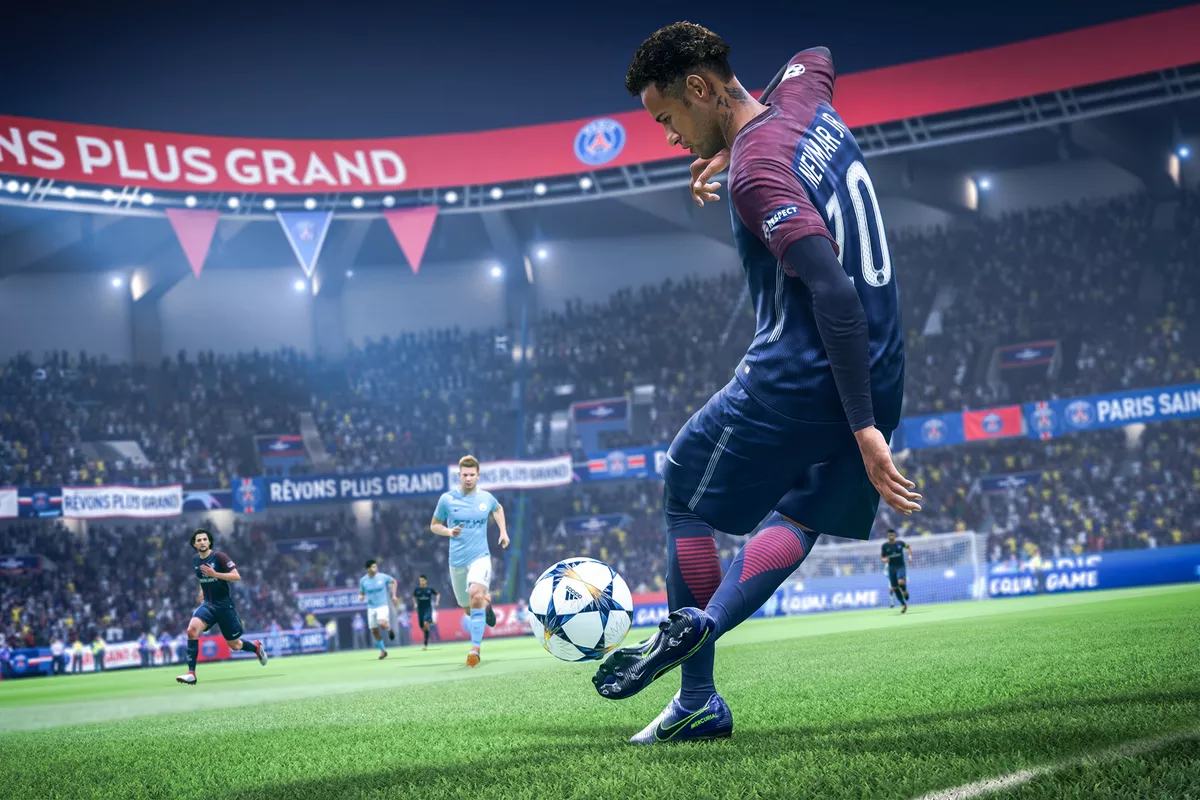

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import os
print(os.listdir("../FIFA data analysis and visualization"))

['.ipynb_checkpoints', 'data.csv', 'Untitled.ipynb']


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
%time data = pd.read_csv('data.csv')
print(data.shape)

Wall time: 392 ms
(18207, 89)


In [4]:
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [5]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]


# let's check the Indian Players 
country('India')

Name  Overall  Potential Position
8605        S. Chhetri       67         67       LS
10011       S. Jhingan       65         71      RCB
12598    J. Lalpekhlua       63         64       RS
12811  G. Singh Sandhu       63         68       GK
13508    A. Edathodika       62         62      LCB
14054        P. Halder       61         67      RCM
14199         P. Kotal       61         66       RB
14218         L. Ralte       61         62       LW
14705           N. Das       60         65       LB
14786         U. Singh       60         67       RM
14915       H. Narzary       60         66       LM
15356         R. Singh       59         59       ST
15643         S. Singh       59         65       CB
15652         A. Thapa       59         71      LCM
15855       M. Rafique       58         61       CM
15864         A. Singh       58         62       GK
15884         B. Singh       58         58       ST
16135          S. Bose       58         66       LB
16265        R. Borges       58         60      CDM
16450          S. Paul       57         57      NaN
16499        A. Mondal       57         57       CB
16539  L. Lalruatthara       57         63      NaN
16793       E. Lyngdoh       56         56      NaN
16903   J. Lalrinzuala       56         64       LB
16976     A. Kuruniyan       56         70       LW
17129         J. Singh       55         58      NaN
17197         V. Kaith       55         64       GK
17339         S. Passi       54         63      NaN
17436   D. Lalhlimpuia       54         67      NaN
17539         C. Singh       53         62      NaN

In [6]:
def club(x):
    return data[data['Club'] == x][['Name', 'Jersey Number', 'Position', 'Overall', 'Nationality', 'Age', 'Wage', 'Value', 'Contract Valid Until']]

club('Manchester United')

Name  Jersey Number Position  Overall  Nationality  Age  \
3               De Gea            1.0       GK       91        Spain   27   
45            P. Pogba            6.0      RDM       87       France   25   
47           R. Lukaku            9.0       ST       87      Belgium   25   
93          A. Sánchez            7.0       RW       85        Chile   29   
116         A. Martial           11.0       LW       84       France   22   
132           N. Matić           31.0      CDM       84       Serbia   29   
211          Juan Mata            8.0       RM       83        Spain   30   
250               Fred           17.0       CM       82       Brazil   25   
254         J. Lingard            7.0      CAM       82      England   25   
319        M. Rashford           11.0       LW       81      England   20   
327          E. Bailly            2.0       CB       81  Ivory Coast   24   
374      Ander Herrera           21.0       CM       81        Spain   28   
377        C. Smalling           12.0      RCB       81      England   28   
399        A. Valencia           16.0       RM       81      Ecuador   32   
454            L. Shaw           23.0       LB       80      England   22   
526          S. Romero            1.0       GK       80    Argentina   31   
584        V. Lindelöf            3.0       CB       79       Sweden   23   
629            M. Rojo           16.0       CB       79    Argentina   28   
654           P. Jones            4.0       CB       79      England   26   
700        M. Fellaini            8.0       CM       79      Belgium   30   
717           A. Young           18.0       LB       79      England   32   
807    Andreas Pereira           15.0       CM       78       Brazil   22   
1313        M. Darmian           36.0       LB       76        Italy   28   
2561          L. Grant           13.0       GK       74      England   35   
3451       Diogo Dalot           20.0       RB       72     Portugal   19   
4513      S. McTominay           17.0       CM       71     Scotland   21   
8191          A. Gomes           47.0      CAM       67      England   17   
10087         T. Chong           44.0       RW       65  Netherlands   18   
10457      E. Hamilton           48.0       CM       65     Scotland   19   
10461       C. Gribbin           42.0      CAM       65      England   19   
11081         R. Poole           50.0       CB       64        Wales   20   
11422      R. Williams           52.0       CB       64      England   19   
12545         J. Bohui           46.0       ST       63      England   19   

        Wage   Value Contract Valid Until  
3      €260K    €72M                 2020  
45     €210K    €64M                 2021  
47     €230K  €62.5M                 2022  
93     €215K  €37.5M                 2022  
116    €165K  €42.5M                 2019  
132    €165K    €24M                 2020  
211    €160K  €24.5M                 2019  
250    €140K  €26.5M                 2023  
254    €140K  €26.5M                 2021  
319    €110K    €27M                 2020  
327    €105K    €21M                 2020  
374    €140K  €17.5M                 2019  
377    €130K    €16M                 2019  
399    €120K    €10M                 2019  
454     €96K  €16.5M                 2023  
526     €91K     €9M                 2021  
584     €91K  €14.5M                 2021  
629    €115K    €10M                 2021  
654    €110K    €12M                 2019  
700    €120K  €11.5M                 2020  
717    €110K     €7M                 2019  
807     €91K    €14M                 2019  
1313    €88K     €6M                 2019  
2561    €39K   €1.3M                 2020  
3451    €26K   €4.7M                 2023  
4513    €43K   €3.8M                 2021  
8191    €15K   €1.5M                 2021  
10087   €13K   €1.1M                 2019  
10457   €11K     €1M                 2020  
10461   €11K   €1.2M                 2019  
11081   €13K   €675K               

In [7]:
x = club('Manchester United')
x.shape

(33, 9)

In [8]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [9]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

#### Data cleaning

In [10]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [11]:
data.fillna(0, inplace = True)

In [12]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Agression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPowder', 'LongShots', 'Penalties']].mean()).mean()))


In [13]:
# renaming a column 
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis=1)
data['Mental'] = data.apply(mental, axis=1)
data['Passing'] = data.apply(passing, axis=1)
data['Mobility'] = data.apply(mobility, axis=1)
data['Power'] = data.apply(power, axis=1)
data['Rating'] = data.apply(rating, axis=1)
data['Shooting'] = data.apply(shooting, axis=1)

C:\Users\SHREYA BANSAL\Anaconda3\lib\site-packages\pandas\core\series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [14]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      76       87        91     74   
1  Cristiano Ronaldo         27       88      75       81        91     83   
2          Neymar Jr         28       85      76       80        94     69   
3             De Gea         16       26      44       39        66     54   
4       K. De Bruyne         59       79      82       92        81     76   

   Rating  Shooting                                 Flag  Age Nationality  \
0      94        89  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1      94        87  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2      92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3      92        19  https://cdn.sofifa.org/flags/45.png   27       Spain   
4      92        83   https://cdn.sofifa.org/flags/7.png   27     Belgium   

                                            Photo  \
0  https://cdn.sofifa.org/players/4/19/158023.png   
1   https://cdn.sofifa.org/players/4/19/20801.png   
2  https://cdn.sofifa.org/players/4/19/190871.png   
3  https://cdn.sofifa.org/players/4/19/193080.png   
4  https://cdn.sofifa.org/players/4/19/192985.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

### Data Visualization

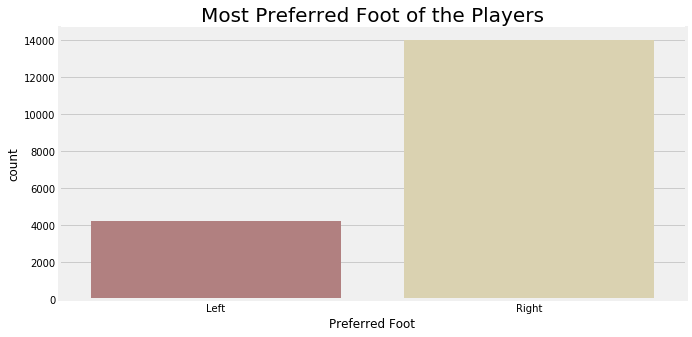

In [15]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

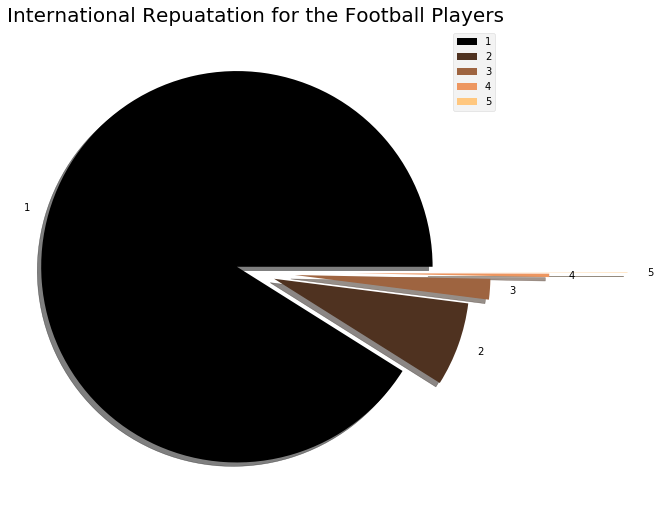

In [16]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

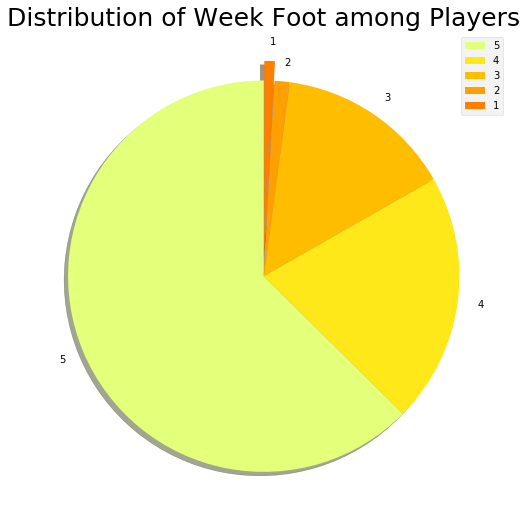

In [17]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

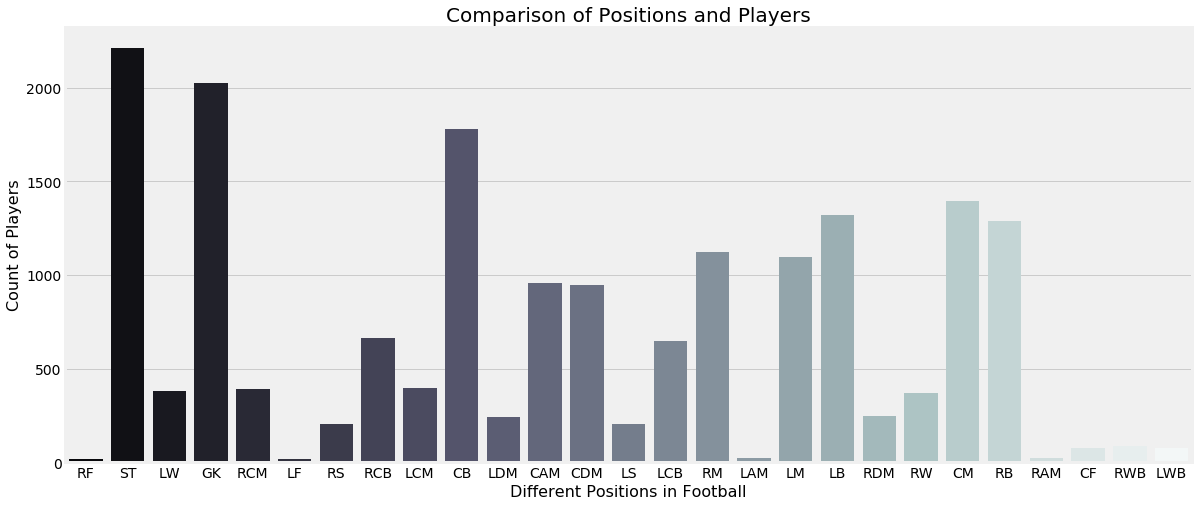

In [18]:
# different positions acquired by the players

plt.figure(figsize = (18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data=data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [19]:
# defining a function for cleaning the weight data

def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

# applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x: extract_value_from(x))
data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [20]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)    

In [21]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))
data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

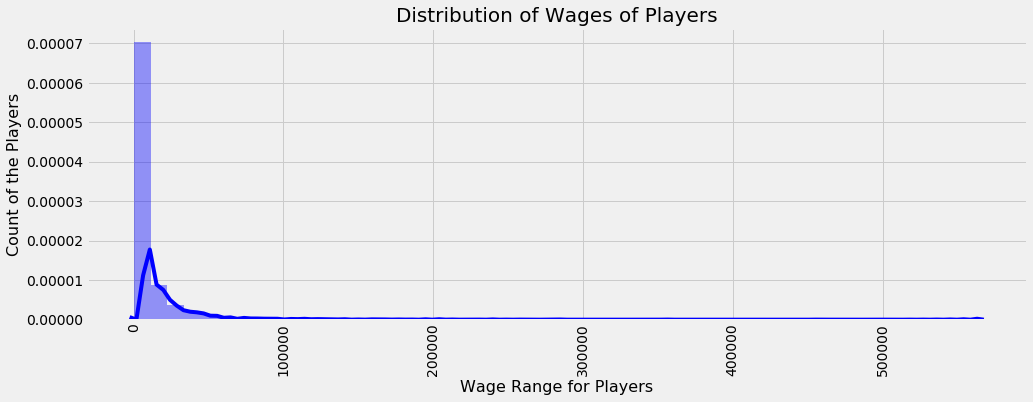

In [22]:
# Comparing the players' Wages

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

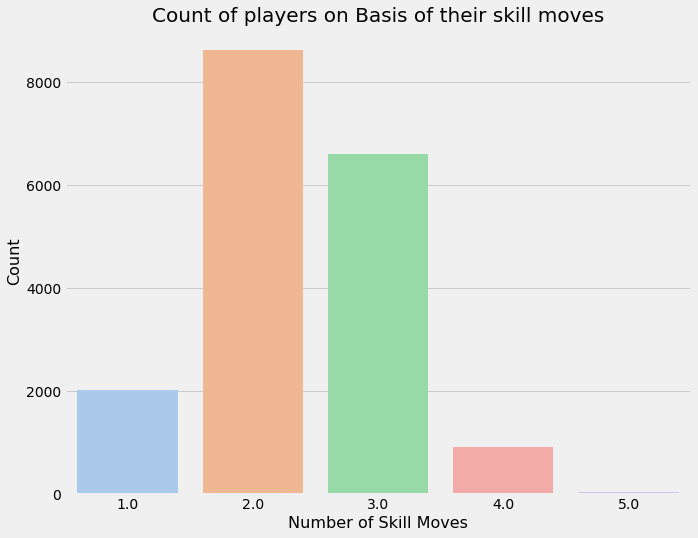

In [23]:
# Skill Moves of Players

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

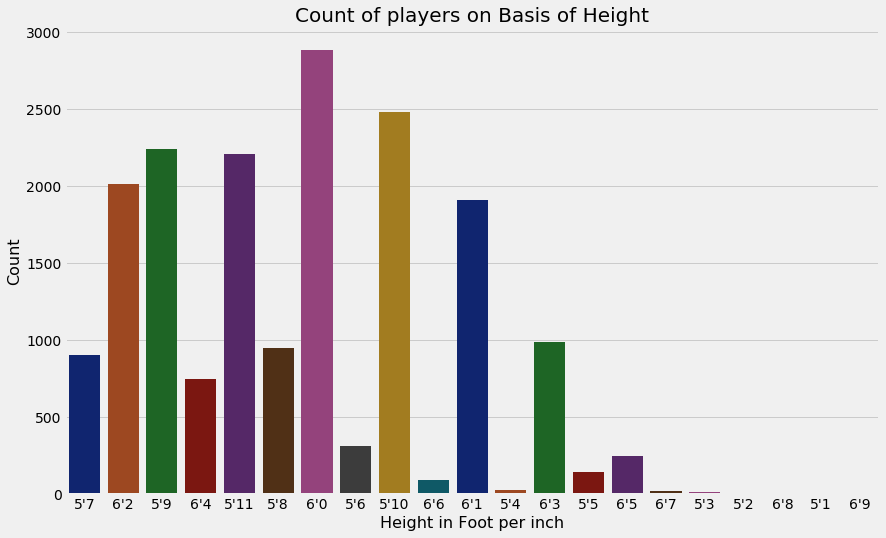

In [24]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

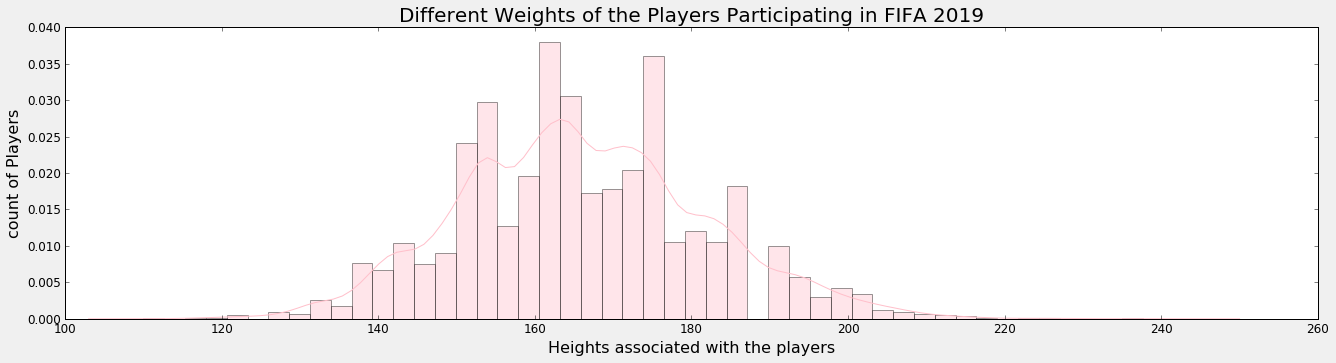

In [25]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(data['Weight'], color = 'pink')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()



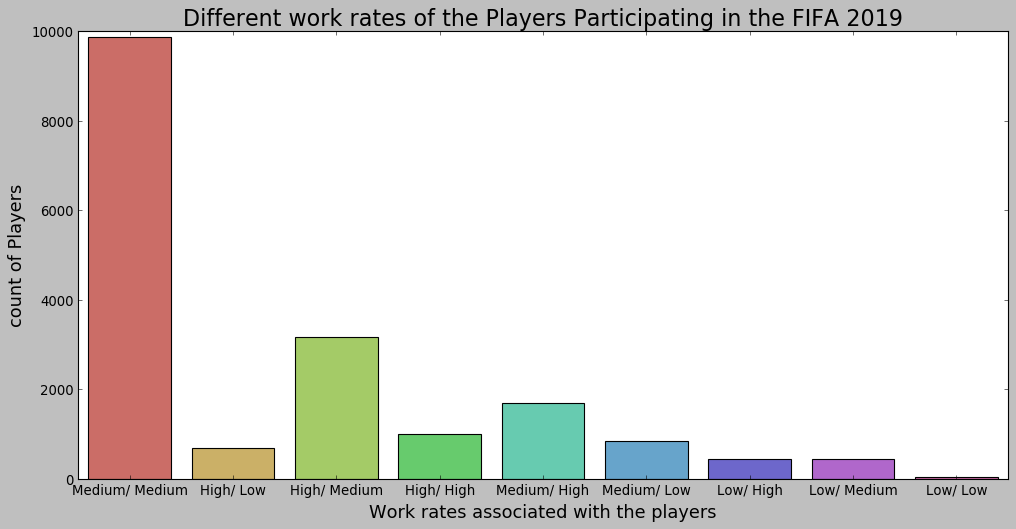

In [26]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

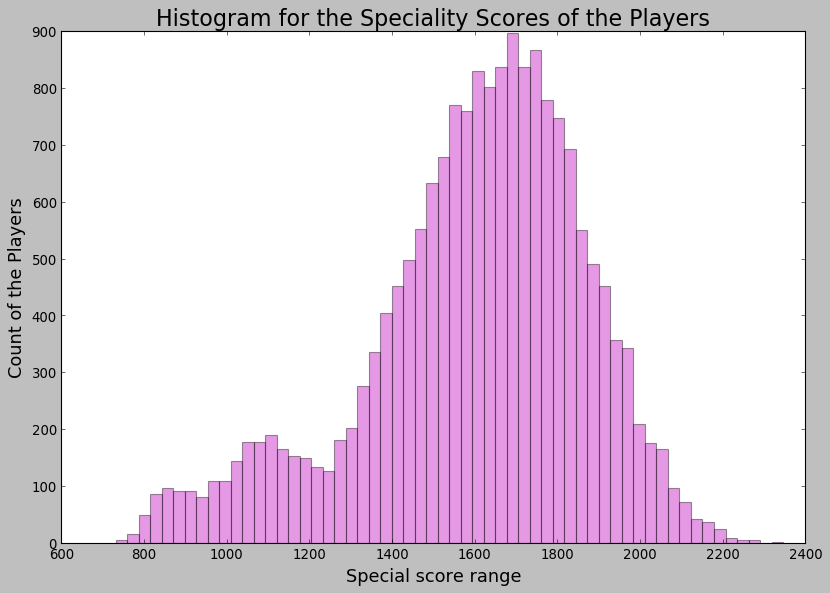

In [27]:
# To show Different Speciality Score of the players participating in the FIFA 2019

x = data.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

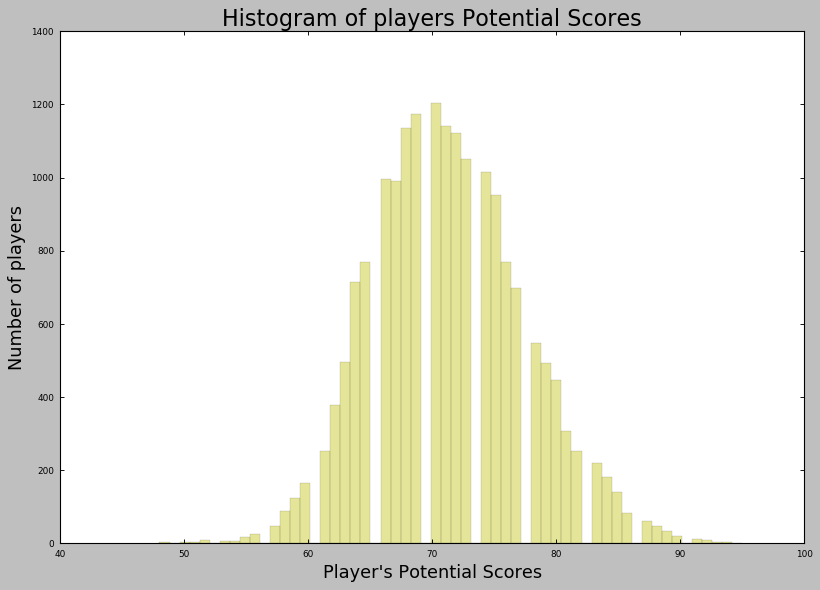

In [28]:
# To show Different potential scores of the players participating in the FIFA 2019

x = data.Potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()



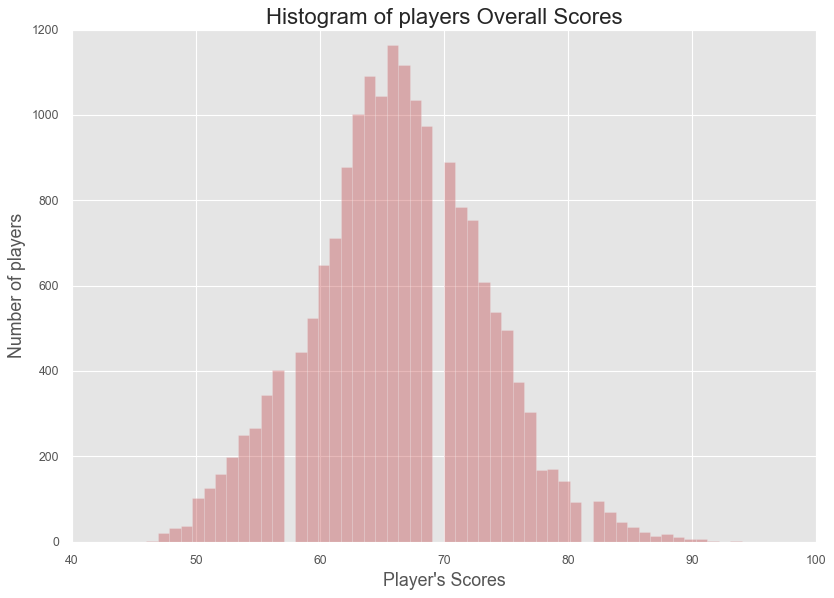

In [29]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()



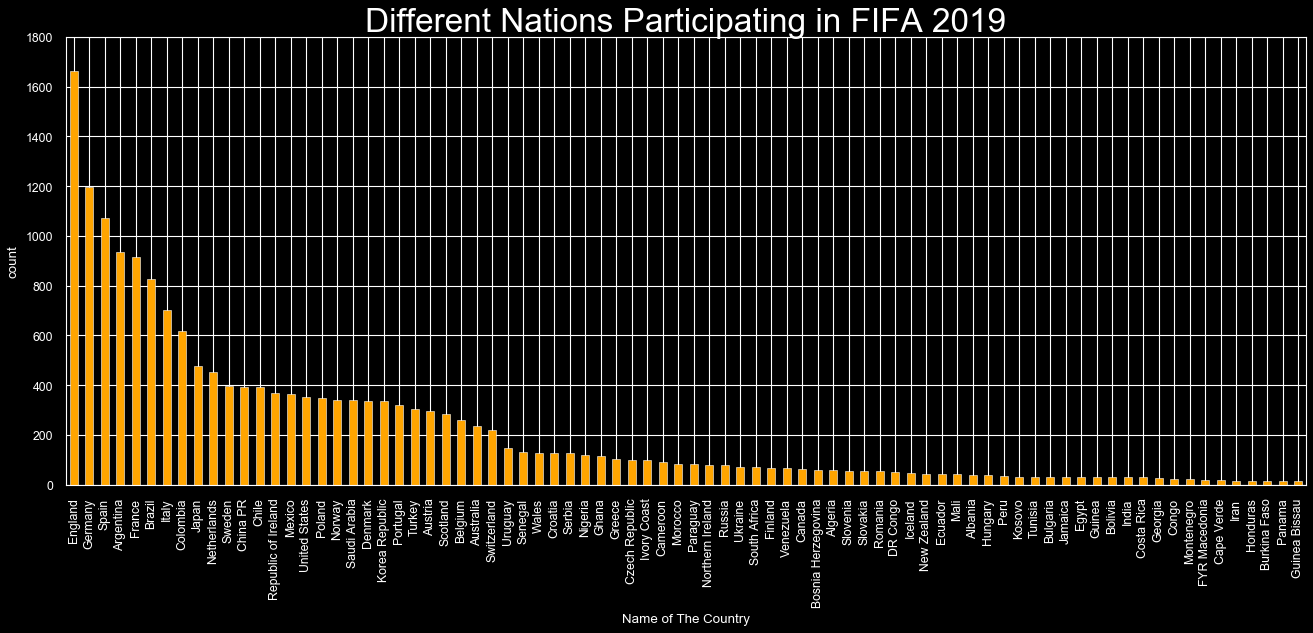

In [30]:
# To show Different nations participating in the FIFA 2019

plt.style.use('dark_background')
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

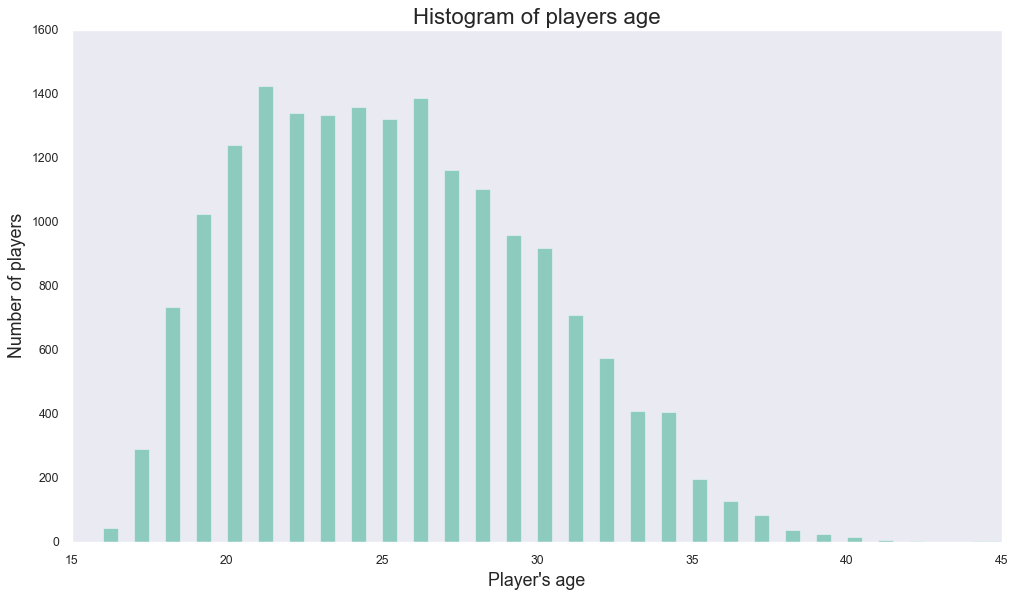

In [31]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

In [32]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

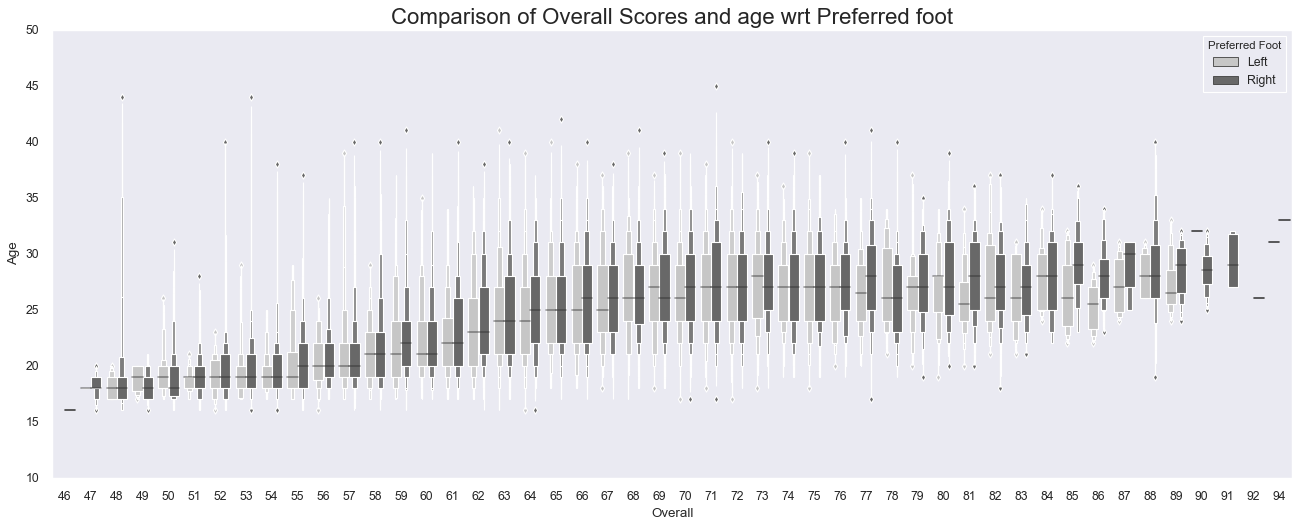

In [33]:
# violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

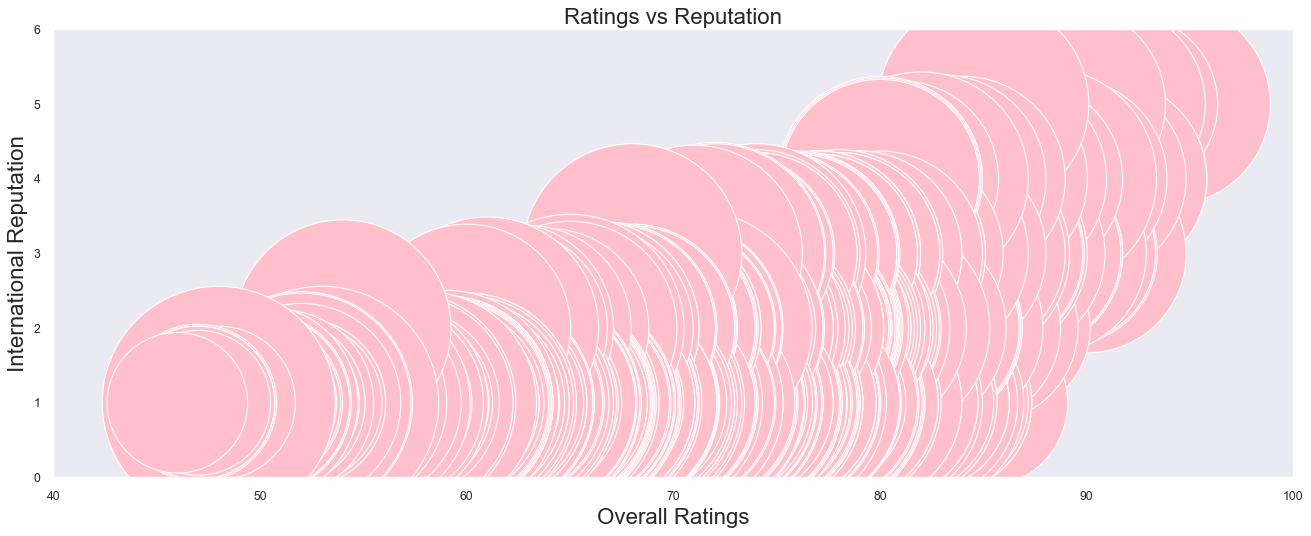

In [34]:
# bubble plot

plt.scatter(data['Overall'], data['International Reputation'], s = data['Age']*1000, c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.title('Ratings vs Reputation', fontweight = 20, fontsize = 20)
#plt.legend('Age', loc = 'upper left')
plt.show()



In [35]:
data_selected.sample(5)

Name  Age Nationality  Overall  Potential              Club  \
847     Lucas Pérez   29       Spain       78         78   West Ham United   
11549    N. Belvito   31      France       64         64  Grenoble Foot 38   
4813   Edson Farias   26      Brazil       70         71       CD Feirense   
9092     N. Douchez   38      France       66         66       Red Star FC   
6353      A. Kalulu   22      France       69         78     FC Basel 1893   

            Value     Wage  Special Preferred Foot  ...  Composure  Marking  \
847    10500000.0  85000.0     1970           Left  ...       75.0     25.0   
11549    400000.0   2000.0     1476          Right  ...       53.0     12.0   
4813    2100000.0   7000.0     1881          Right  ...       62.0     65.0   
9092      40000.0   1000.0     1055          Right  ...       59.0      9.0   
6353    1600000.0  11000.0     1740          Right  ...       67.0     50.0   

       StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
847              24.0          26.0     14.0        8.0       8.0   
11549            23.0          13.0      8.0       14.0       9.0   
4813             70.0          66.0     16.0       12.0      12.0   
9092             13.0          14.0     64.0       65.0      65.0   
6353             21.0          14.0      9.0        6.0      13.0   

       GKPositioning  GKReflexes  Release Clause  
847             10.0        10.0            €20M  
11549            7.0        12.0           €700K  
4813            13.0        10.0           €4.5M  
9092            66.0        64.0            €70K  
6353             7.0        11.0           €2.8M  

[5 rows x 52 columns]

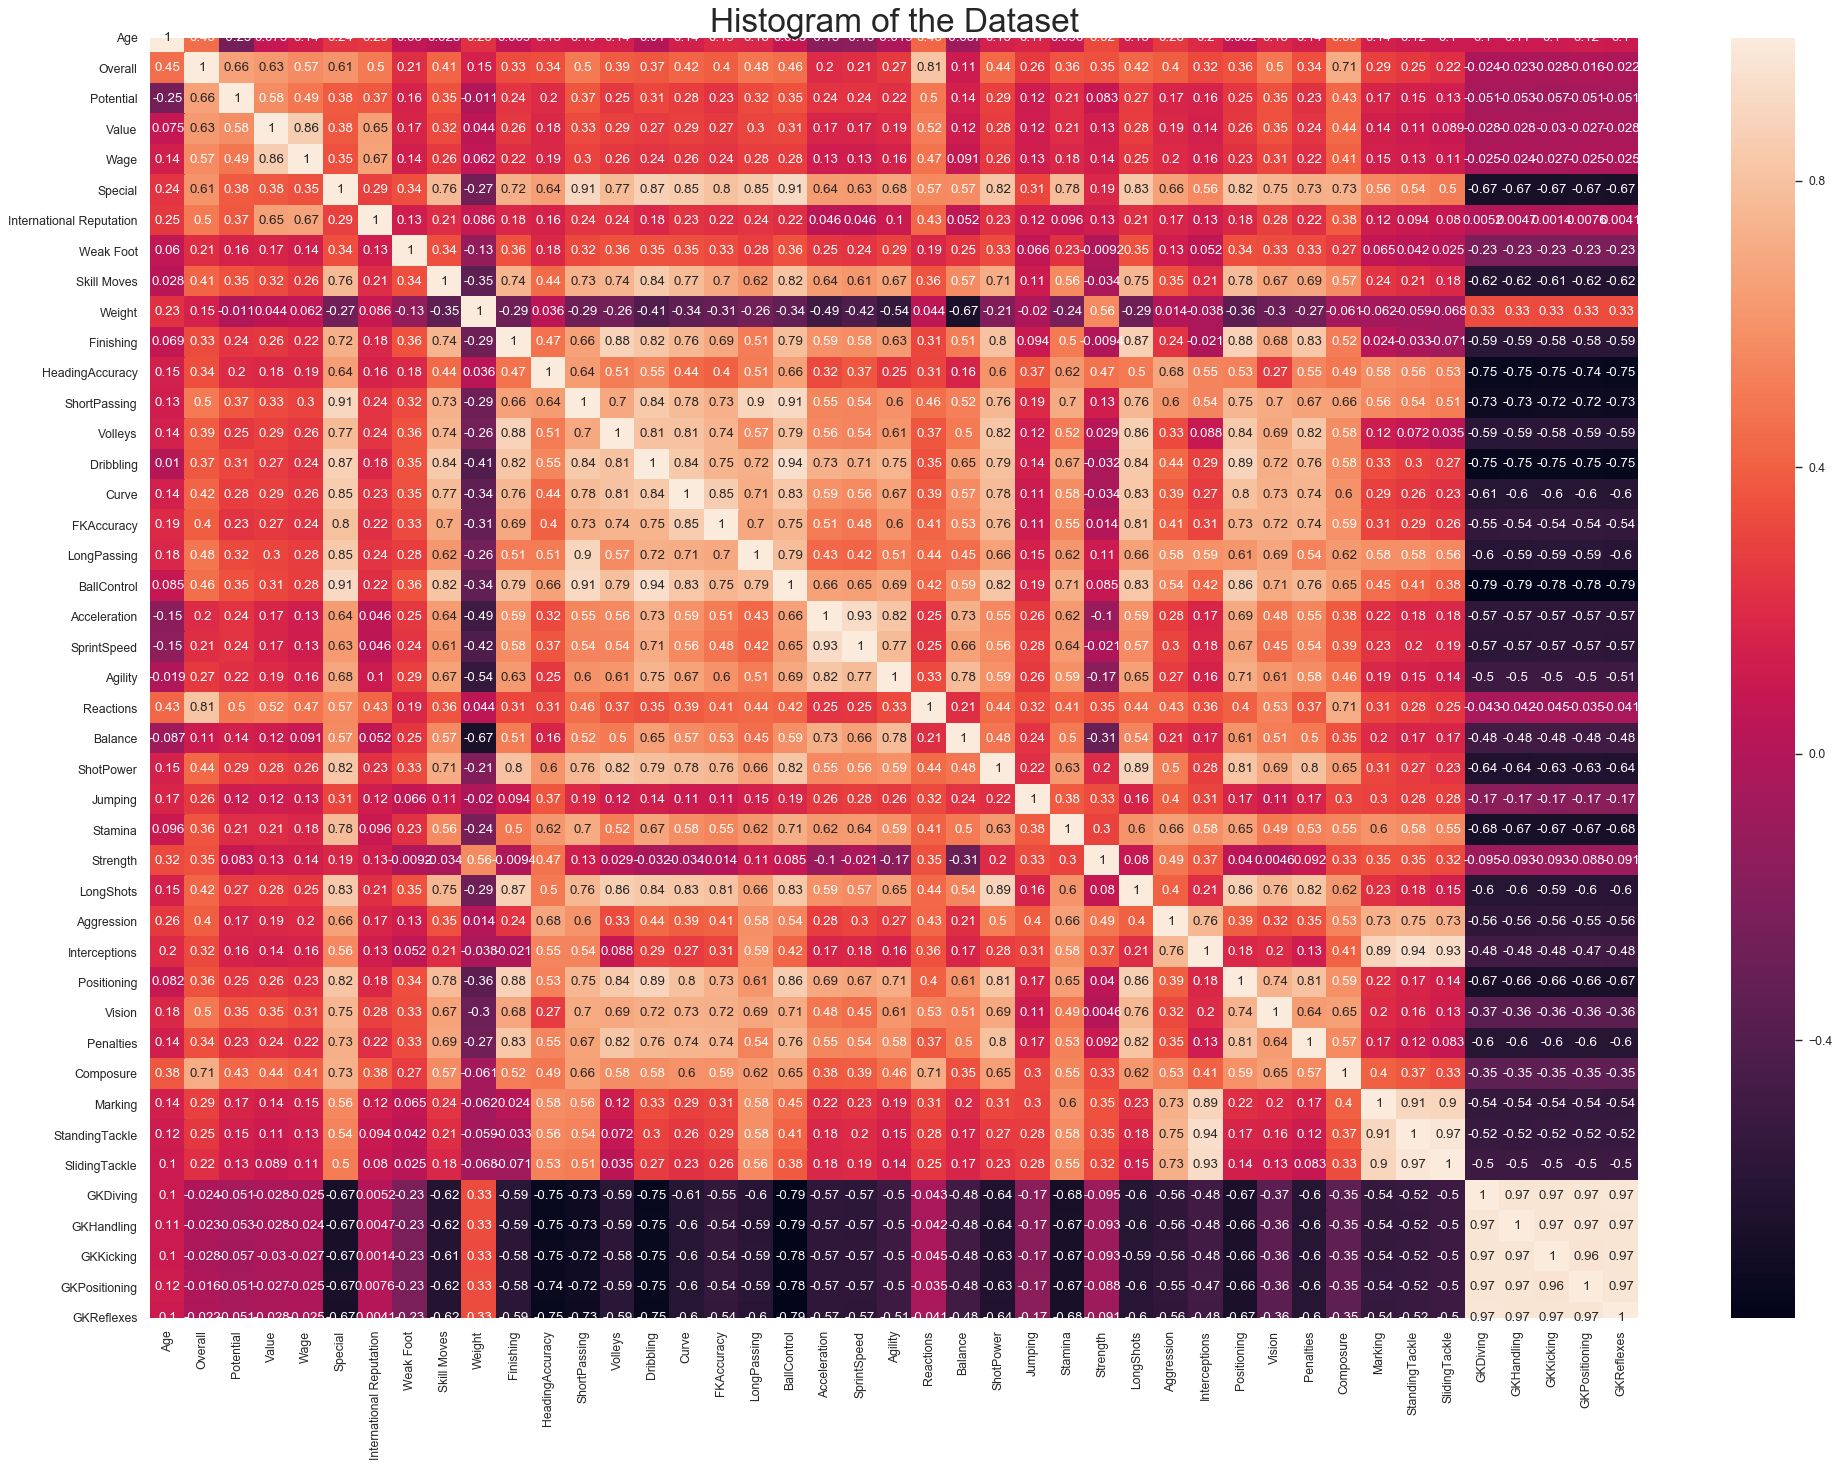

In [36]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

## Best players per each position with their age, club, and nationality based on their Overall Scores

In [37]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position               Name  Age                      Club Nationality
17       CAM       A. Griezmann   27           Atlético Madrid      France
12        CB           D. Godín   32           Atlético Madrid     Uruguay
20       CDM    Sergio Busquets   29              FC Barcelona       Spain
271       CF       Luis Alberto   25                     Lazio       Spain
67        CM             Thiago   27         FC Bayern München       Spain
3         GK             De Gea   27         Manchester United       Spain
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia
35        LB            Marcelo   30               Real Madrid      Brazil
24       LCB       G. Chiellini   33                  Juventus       Italy
11       LCM           T. Kroos   28               Real Madrid     Germany
14       LDM           N. Kanté   27                   Chelsea      France
5         LF          E. Hazard   27                   Chelsea     Belgium
33        LM      P. Aubameyang   29                   Arsenal       Gabon
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                  Juventus    Colombia
69        RB        Azpilicueta   28                   Chelsea       Spain
8        RCB       Sergio Ramos   32               Real Madrid       Spain
4        RCM       K. De Bruyne   27           Manchester City     Belgium
45       RDM           P. Pogba   25         Manchester United      France
0         RF           L. Messi   31              FC Barcelona   Argentina
25        RM          K. Mbappé   19       Paris Saint-Germain      France
7         RS          L. Suárez   31              FC Barcelona     Uruguay
56        RW     Bernardo Silva   23           Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal

## Best players from each positions with their age, nationality, club based on their potential scores

In [38]:
data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                 Name  Age                     Club Nationality
31       CAM           C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB            S. Umtiti   24             FC Barcelona      France
27       CDM             Casemiro   26              Real Madrid      Brazil
350       CF             A. Milik   24                   Napoli      Poland
78        CM  S. Milinković-Savić   23                    Lazio      Serbia
3         GK               De Gea   27        Manchester United       Spain
28       LAM         J. Rodríguez   26        FC Bayern München    Colombia
35        LB              Marcelo   30              Real Madrid      Brazil
77       LCB          M. Škriniar   23                    Inter    Slovakia
11       LCM             T. Kroos   28              Real Madrid     Germany
14       LDM             N. Kanté   27                  Chelsea      France
15        LF            P. Dybala   24                 Juventus   Argentina
415       LM             H. Aouar   20       Olympique Lyonnais      France
21        LS            E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW            Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                Jonny   24  Wolverhampton Wanderers       Spain
171      RAM            H. Ziyech   25                     Ajax     Morocco
247       RB         João Cancelo   24                 Juventus    Portugal
8        RCB         Sergio Ramos   32              Real Madrid       Spain
4        RCM         K. De Bruyne   27          Manchester City     Belgium
45       RDM             P. Pogba   25        Manchester United      France
0         RF             L. Messi   31             FC Barcelona   Argentina
25        RM            K. Mbappé   19      Paris Saint-Germain      France
7         RS            L. Suárez   31             FC Barcelona     Uruguay
79        RW        Marco Asensio   22              Real Madrid       Spain
766      RWB         Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST    Cristiano Ronaldo   33                 Juventus    Portugal

### Countries with most players

In [39]:
data['Nationality'].value_counts().head(8)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

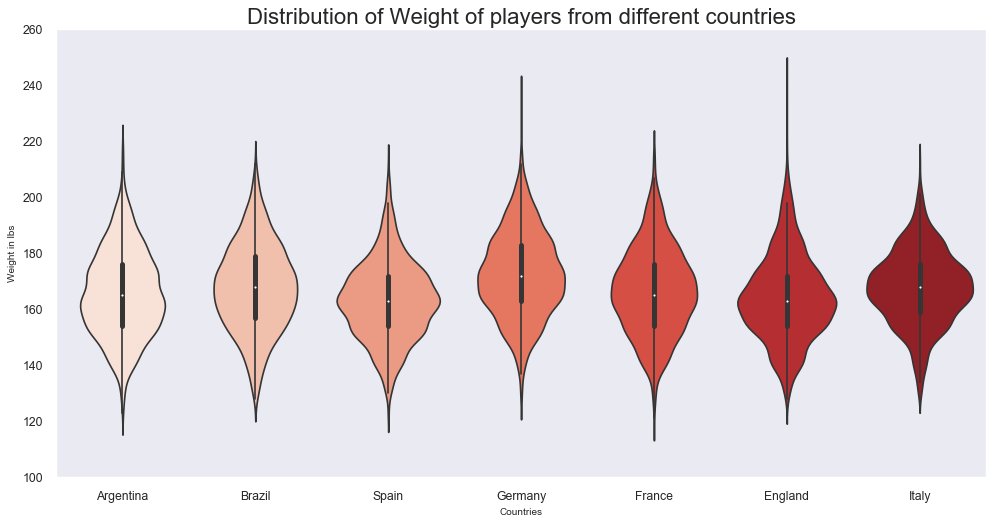

In [40]:
# Every Nations' Players and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

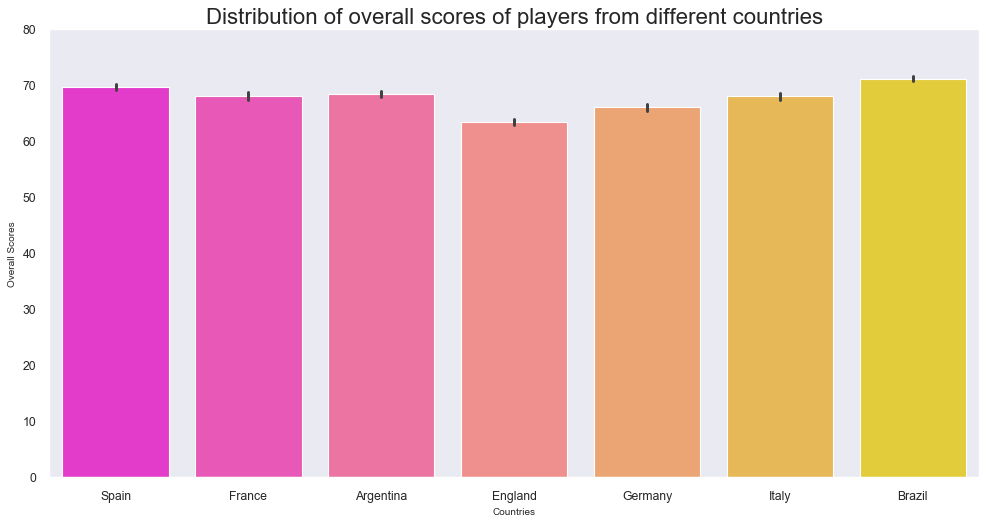

In [41]:
# Every Nations' Player and their overall  scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

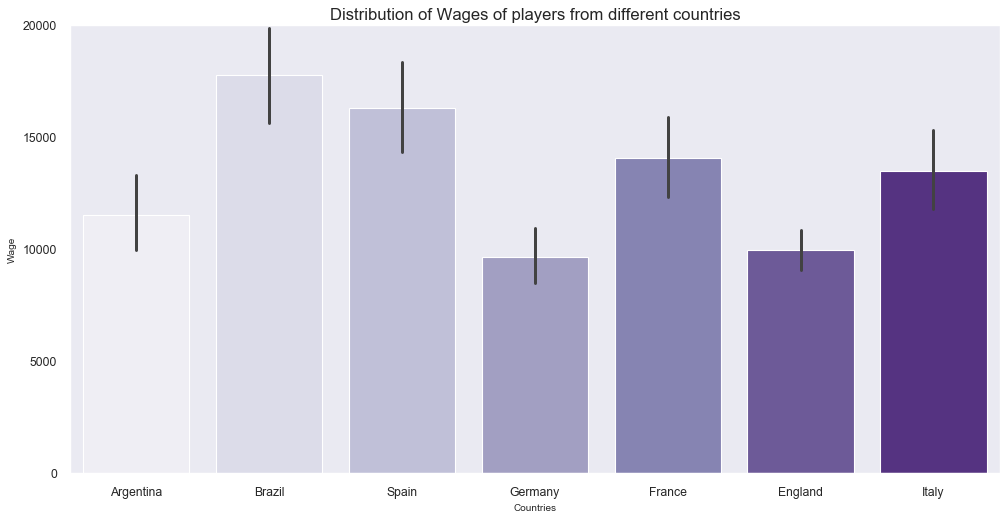

In [42]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

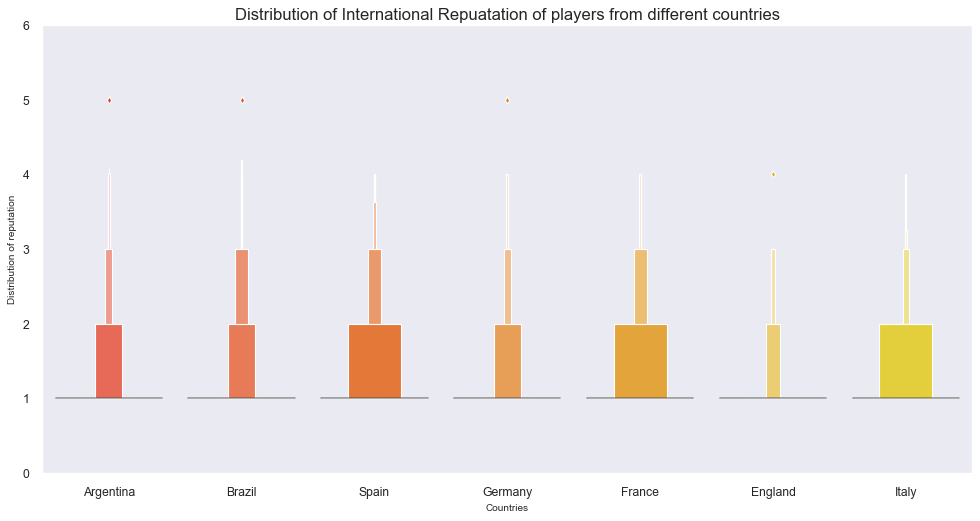

In [43]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [44]:
# finding the the popular clubs around the globe

data['Club'].value_counts().head(10)

No Club              241
Manchester United     33
Burnley               33
Empoli                33
AS Monaco             33
Chelsea               33
Manchester City       33
Borussia Dortmund     33
Real Madrid           33
Liverpool             33
Name: Club, dtype: int64

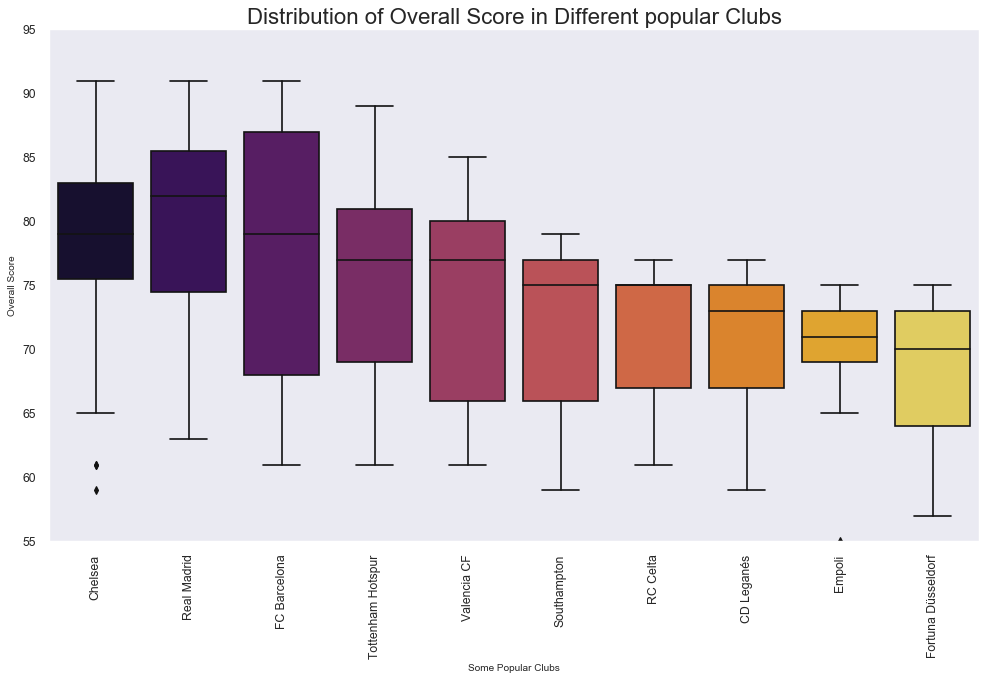

In [45]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()



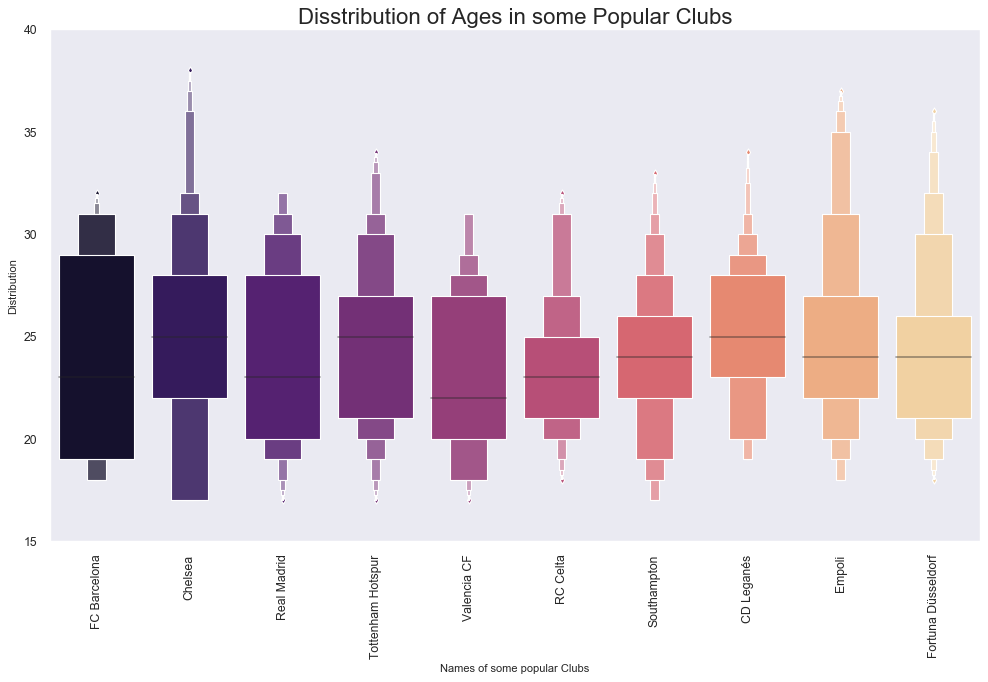

In [46]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()



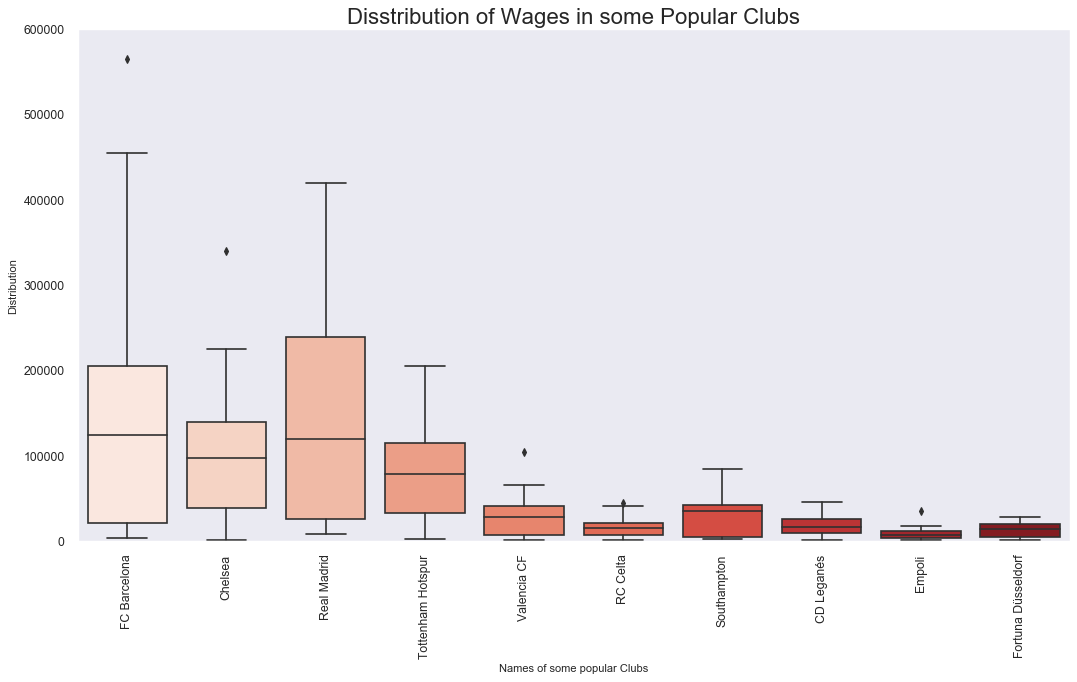

In [47]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

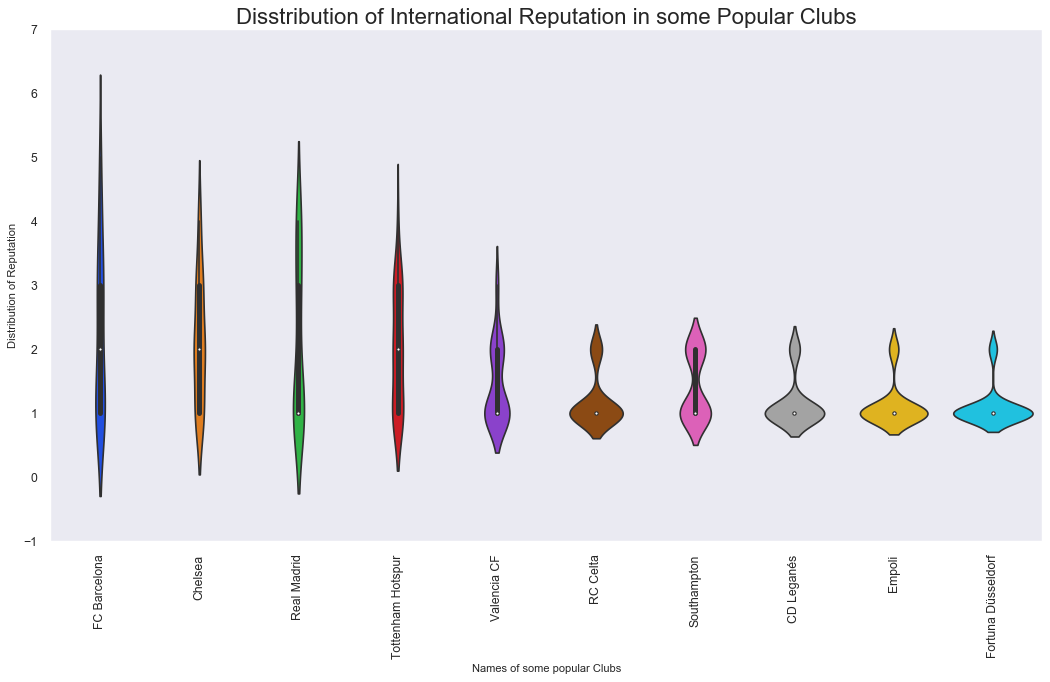

In [48]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()



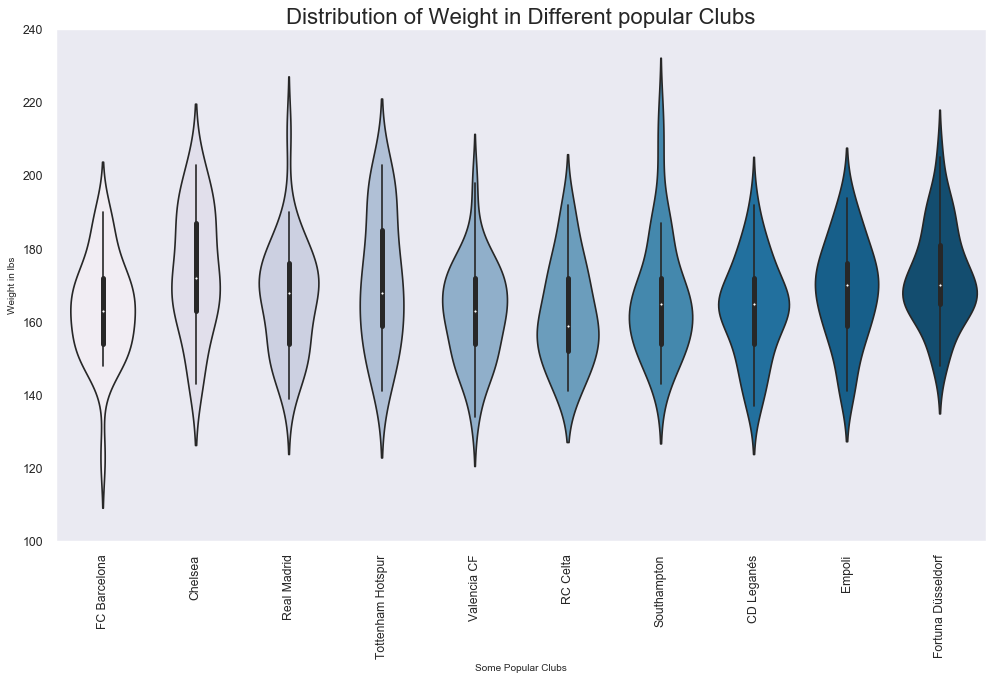

In [49]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'PuBu')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [50]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [51]:
# finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [52]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

#### The longest membership in the club

In [53]:
import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

Club  Years_of_member
Name                                            
O. Pérez                Pachuca               29
M. Al Shalhoub         Al Hilal               22
H. Sogahata     Kashima Antlers               22
M. Ogasawara    Kashima Antlers               22
S. Narazaki      Nagoya Grampus               21
M. Wölfli        BSC Young Boys               20
K. Kitamoto         Vissel Kobe               20
C. Källqvist          BK Häcken               19
Y. Endo             Gamba Osaka               19
S. Pellissier     Chievo Verona               18

In [54]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

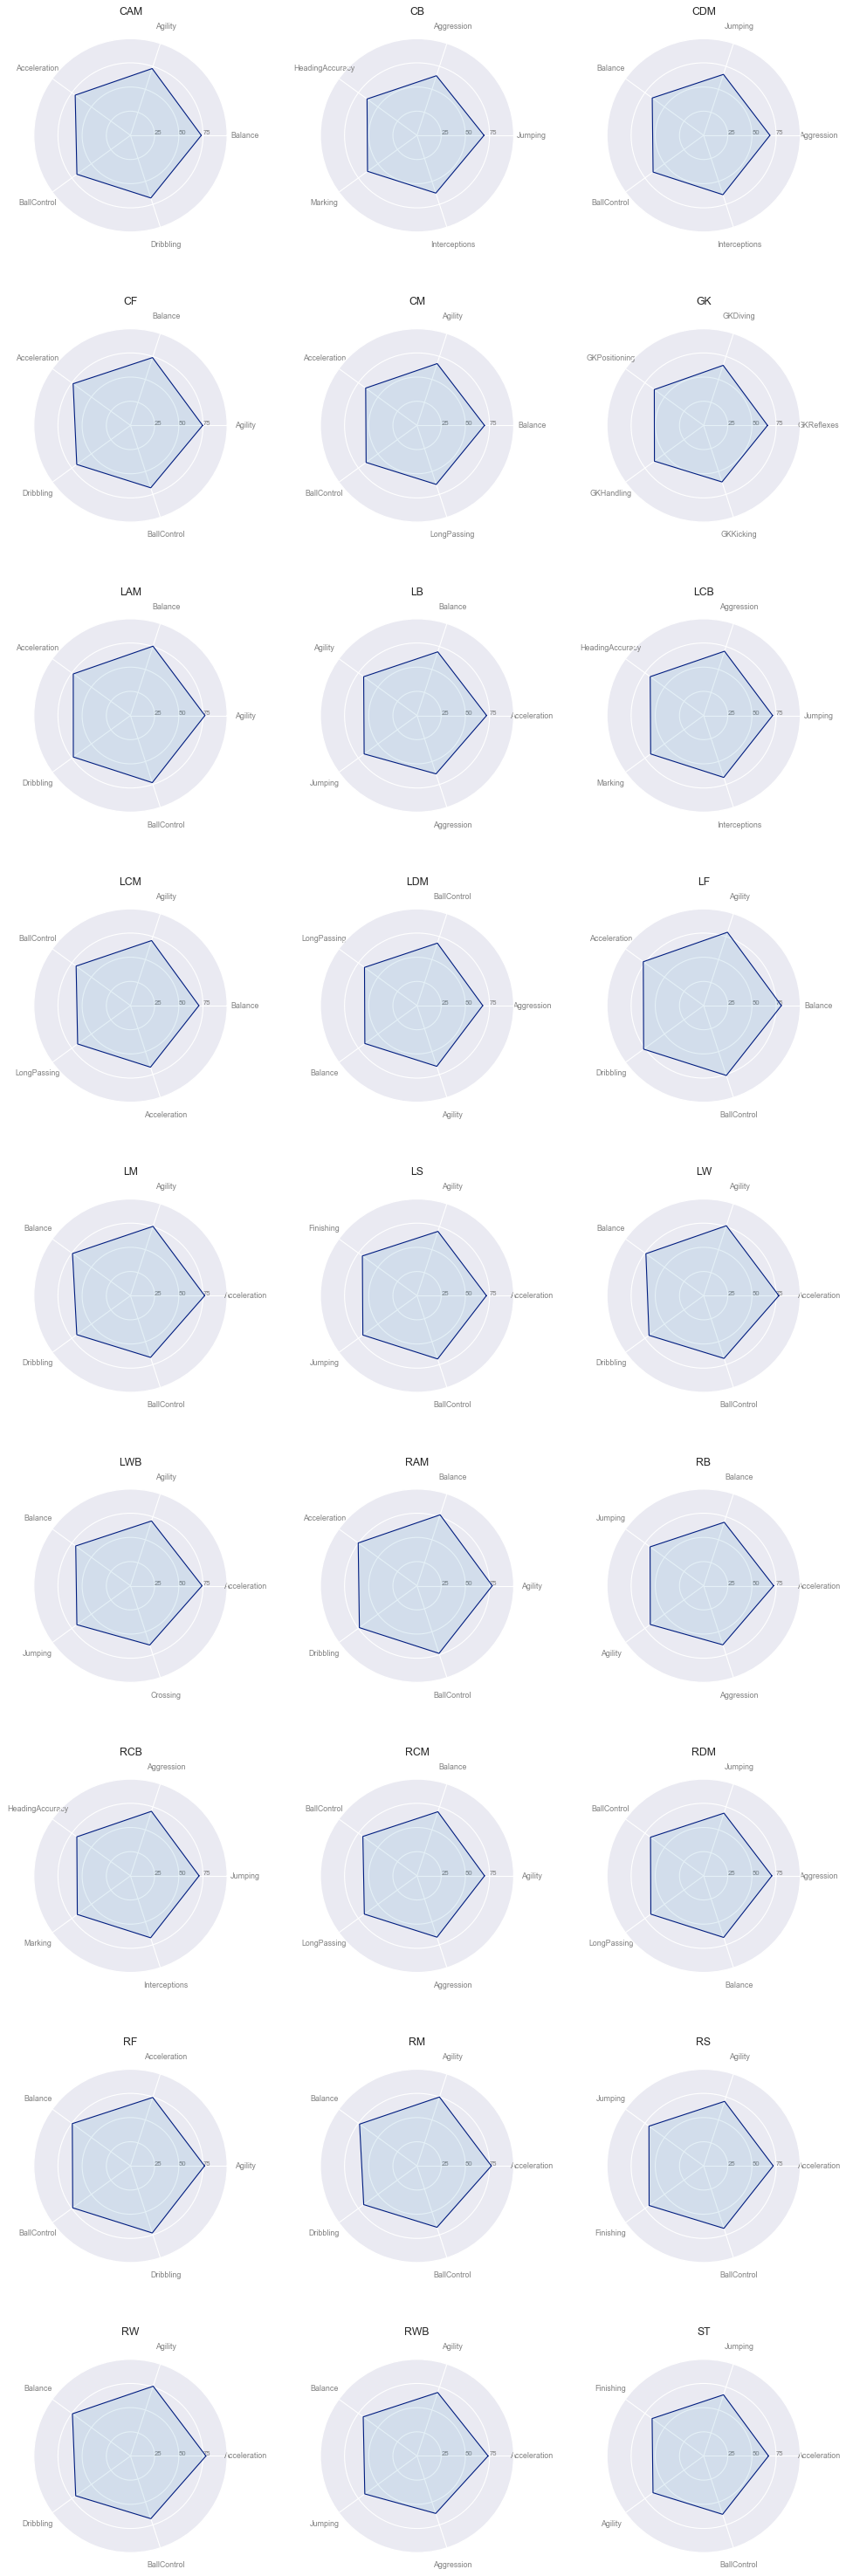

In [55]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [56]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

In [57]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

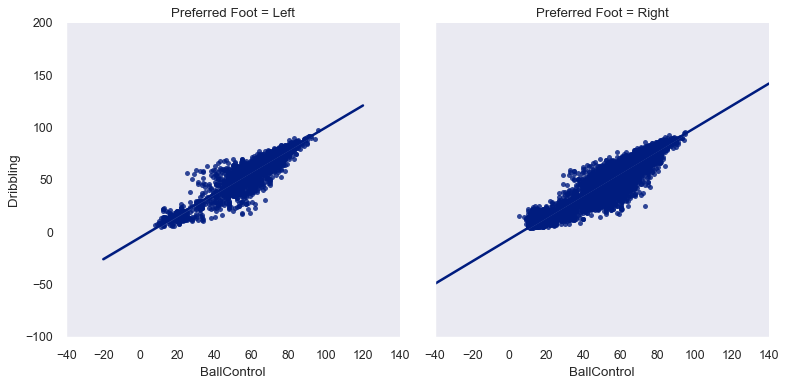

In [58]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

### Clubs with highest number of different countries

In [59]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [60]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

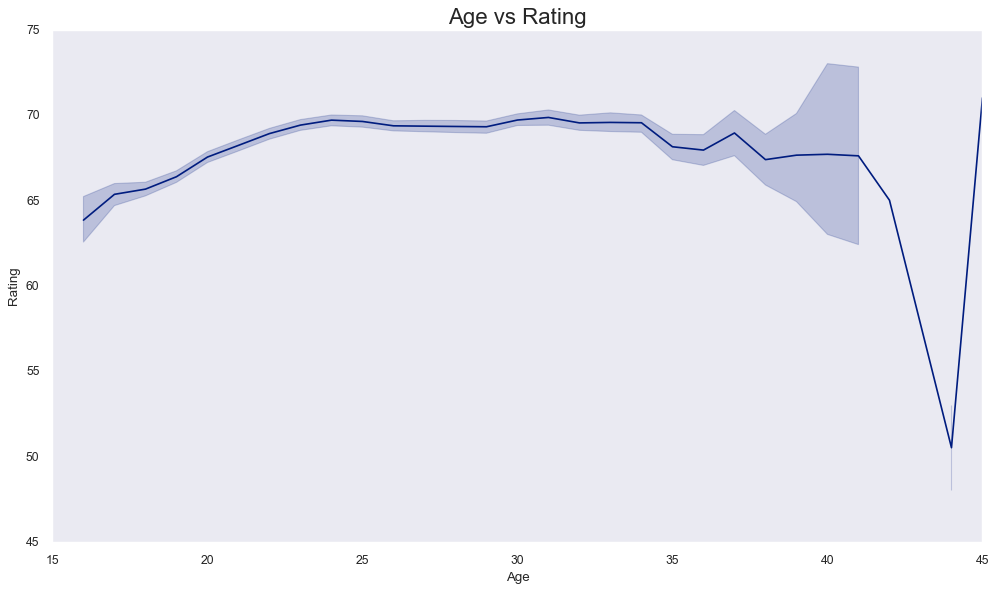

In [61]:
sns.lineplot(data['Age'], data['Rating'], palette = 'Wistia')
plt.title('Age vs Rating', fontsize = 20)

plt.show()

In [62]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [63]:
rating = pd.DataFrame(data.groupby(['Nationality'])['Rating'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Rating'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Rating'],
)]

layout = go.Layout(title = 'Country vs Ratings')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

## Creating a function to check the player's details

In [64]:
def playerdata(x):
    return data.loc[x,:]

x = playerdata(0)  #lionel messi, id = 0.
pd.set_option('display.max_rows', 200)
x = pd.DataFrame(x)
print(x)

                                                                       0
Unnamed: 0                                                             0
ID                                                                158023
Name                                                            L. Messi
Age                                                                   31
Photo                     https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                                    Argentina
Flag                                 https://cdn.sofifa.org/flags/52.png
Overall                                                               94
Potential                                                             94
Club                                                        FC Barcelona
Club_Logo                   https://cdn.sofifa.org/teams/2/light/241.png
Value                                                          1.105e+08
Wage                                               